In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
#Data reading 
Phy_Che = pd.read_pickle('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_qt.pkl')
display(Phy_Che)

,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,season_col,pH,...,Aquatic_500.t,Cropland_500.t,Forest_500.t,Pastures.and.open.nature_500.t,Urban_500.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
1,BE048,AW1_NA1,5.032370,51.327590,Antwerp,Belgium,1,0,Spring,6.355,...,-0.635657,-0.402250,0.910612,-0.067940,-0.654950,0.000000,-0.570731,0.899016,-0.067940,-2.393980
2,BE049,AW1_IN2,5.002750,51.329040,Antwerp,Belgium,1,0,Spring,6.305,...,0.849086,-0.459558,1.063622,-0.346234,0.579132,0.210428,-0.639147,1.052930,-0.346234,0.318639
3,BE050,AW1_EX1,5.032560,51.362150,Antwerp,Belgium,1,0,Spring,6.005,...,-0.635657,0.357345,0.357345,-0.036563,-0.183805,0.000000,0.271036,0.341070,-0.036563,-0.718868
4,BE051,AW1_NA2,4.922010,51.358100,Antwerp,Belgium,1,0,Spring,7.195,...,1.120502,-0.152026,0.413601,0.459558,0.078412,0.593821,-0.282875,0.397935,0.459558,-0.318639
5,BE052,AW1_IN1,5.016750,51.343080,Antwerp,Belgium,1,0,Spring,5.900,...,-0.635657,-0.026114,0.269558,0.591528,-0.554602,0.000000,-0.142907,0.252250,0.591528,-1.618497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,-54.749753,-34.383481,Valle del Cordillera,Uruguay,1,1,Spring,7.880,...,-0.635657,-1.731664,-0.776422,1.665398,-1.150349,0.000000,0.000000,-0.822105,1.665398,0.000000
237,URG027,VCL3,-54.747753,-34.384983,Valle del Cordillera,Uruguay,1,1,Spring,7.800,...,-0.635657,-1.731664,-0.194437,1.343325,-1.150349,0.000000,0.000000,-0.219486,1.343325,0.000000
238,URG028,VCH1,-54.759703,-34.383453,Valle del Cordillera,Uruguay,1,1,Spring,9.610,...,-0.635657,-0.335166,-1.181259,1.369531,-0.390951,0.000000,-0.491989,-1.260117,1.369531,-1.123769
239,URG029,VCH2,-54.767964,-34.379486,Valle del Cordillera,Uruguay,1,1,Spring,8.470,...,-0.635657,-0.324138,-0.604016,1.140287,-1.150349,0.000000,-0.479169,-0.641518,1.140287,0.000000


In [3]:
Phy_Che.columns

Index(['Pond_ID', 'PondCode', 'X', 'Y', 'Pondscape', 'Country', 'Strat_Survey',
       'Resampling', 'season_col', 'pH', 'O2_con', 'O2_sat', 'Turb', 'Sludge',
       'Snel', 'Cond', 'T', 'TN', 'TP', 'DOC', 'TOC', 'CHLa', 'PC',
       'Sulphates', 'Chlorides', 'Alkalinity', 'Ca', 'Mg', 'Na', 'K', 'TSS',
       'N.NO3', 'P.PO4', 'N.NH4', 'N.NO2', 'CHLa_Spectro', 'N.NO23', 'Fe',
       'Secchi_Depth', 'CHLa_RFU', 'PC_RFU', 'TDN', 'OM', 'year',
       'Hydeoperiod_length', 'bio1', 'bio4', 'bio5', 'bio6', 'bio7', 'bio12',
       'bio15', 'bio17', 'Nat_res', 'Area', 'Depth', 'Pond_dries',
       'Rel_waterlev', 'PVI', 'Animals_cont', 'lifestockQ', 'Natural_5',
       'Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500', 'Urban_500', 'ECELS', 'bio1.t',
       'bio4.t', 'bio5.t', 'bio6.t', 'bio7.t', 'bio12.t', 'bio15.t', 'bio17.t',
       'Area.t', 'Depth.t', 'Animals_cont.t', 'Hydeoperiod_length.t',
       'ECELS.t', 'Natural_5.t', 'Aquatic_500.t', 'Cropland_500.

In [7]:
Phy_Che_subset=Phy_Che[['Hydeoperiod_length', 'bio1', 'bio4', 'bio5', 'bio6', 'bio7', 'bio12',
       'bio15', 'bio17', 'Nat_res', 'Area', 'Depth', 'Pond_dries',
       'Animals_cont', 'lifestockQ', 'Natural_5',
       'Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500', 'Urban_500', 'ECELS']]

<Axes: ylabel='Frequency'>

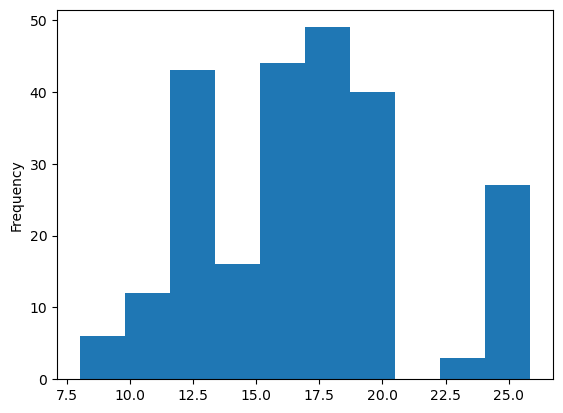

In [18]:
Phy_Che_subset['bio7'].plot.hist()

<Axes: ylabel='Frequency'>

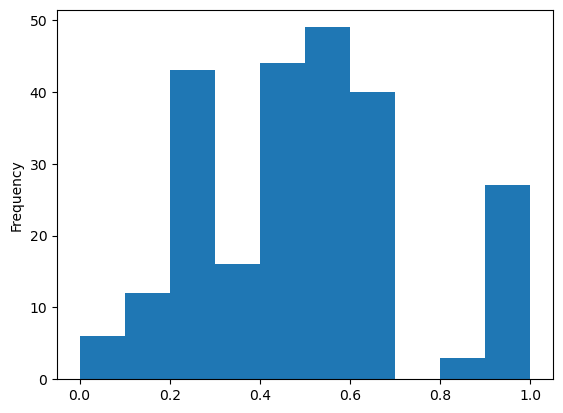

In [17]:
Phy_Che_subset_scaled['bio7'].plot.hist()

In [8]:
# Initialize the scaler
scaler = MinMaxScaler()

# Apply the scaler to each column
Phy_Che_subset_scaled = pd.DataFrame(scaler.fit_transform(Phy_Che_subset), columns=Phy_Che_subset.columns)

In [9]:
Phy_Che_subset_scaled

,Hydeoperiod_length,bio1,bio4,bio5,bio6,bio7,bio12,bio15,bio17,Nat_res,...,Pond_dries,Animals_cont,lifestockQ,Natural_5,Aquatic_500,Cropland_500,Forest_500,Pastures.and.open.nature_500,Urban_500,ECELS
0,1.0,0.311528,0.422238,0.351998,0.291161,0.470357,0.366310,0.075238,0.504612,1.0,...,0.0,0.333333,0.0,0.02,0.000000,0.090853,0.653063,0.269621,0.000279,0.676471
1,1.0,0.310961,0.420191,0.350116,0.291031,0.469033,0.366310,0.077503,0.504612,0.0,...,0.0,0.333333,0.0,0.70,0.015582,0.078482,0.727425,0.186176,0.031528,0.911765
2,1.0,0.309184,0.421571,0.350054,0.289308,0.470128,0.366310,0.077081,0.504612,0.0,...,0.0,0.333333,0.0,0.80,0.000000,0.394840,0.349361,0.273702,0.003481,0.823529
3,1.0,0.305428,0.418140,0.343412,0.288646,0.465595,0.368984,0.076746,0.504612,0.0,...,0.8,0.333333,0.0,0.00,0.072165,0.177728,0.361075,0.442951,0.010449,0.794118
4,1.0,0.310660,0.420836,0.350489,0.290581,0.469611,0.366310,0.077305,0.504612,0.0,...,0.8,0.333333,0.0,0.57,0.000000,0.217802,0.306840,0.491032,0.000696,0.985294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.0,0.896693,0.121012,0.654153,0.663939,0.449990,0.647059,0.239170,0.634438,0.0,...,0.0,0.500000,0.0,0.00,0.000000,0.000000,0.073965,0.937537,0.000000,NaN
236,1.0,0.896693,0.121012,0.654153,0.663939,0.449990,0.647059,0.239170,0.634438,0.0,...,0.0,0.500000,0.0,0.02,0.000000,0.000000,0.153400,0.858150,0.000000,NaN
237,1.0,0.896693,0.121012,0.654153,0.663939,0.449990,0.647059,0.239170,0.634438,0.0,...,0.0,0.666667,1.0,0.00,0.000000,0.124688,0.028872,0.859792,0.001289,NaN
238,1.0,0.896693,0.121012,0.654153,0.663939,0.449990,0.647059,0.239170,0.634438,0.0,...,0.0,0.666667,1.0,0.00,0.000000,0.129586,0.091902,0.792624,0.000000,NaN
